## Uppgift 0 - Iris flower dataset

## A

In [160]:
from sklearn.datasets import load_iris

# Ladda Iris-datasetet
iris = load_iris()

# Visa nycklarna i datasetet
print("Nycklar i datasetet:", iris.keys())

# Visa värdena för varje nyckel
for key in iris.keys():
    print(f"\n{key}:")
    print(iris[key])

Nycklar i datasetet: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3. 

## B

In [161]:
import pandas as pd

# Skapa en DataFrame från datan
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Lägg till 'species' som en kolumn i DataFrame
df['species'] = iris.target

# Visa de första raderna i DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## C

Gör en grundläggande EDA (Exploratory Data Analysis) för att förstå datasetet bättre.

In [162]:
# Visa grundläggande statistik för datasetet
print(df.describe())

# Visa antalet observationer per klass
print("\nAntal observationer per klass:")
print(df['species'].value_counts())

# Visa datatyperna för varje kolumn
print("\nDatatyper:")
print(df.dtypes)

# Kolla efter saknade värden
print("\nSaknade värden:")
print(df.isnull().sum())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Antal observationer per klass:
species
0    50
1    50
2    50
Name: co

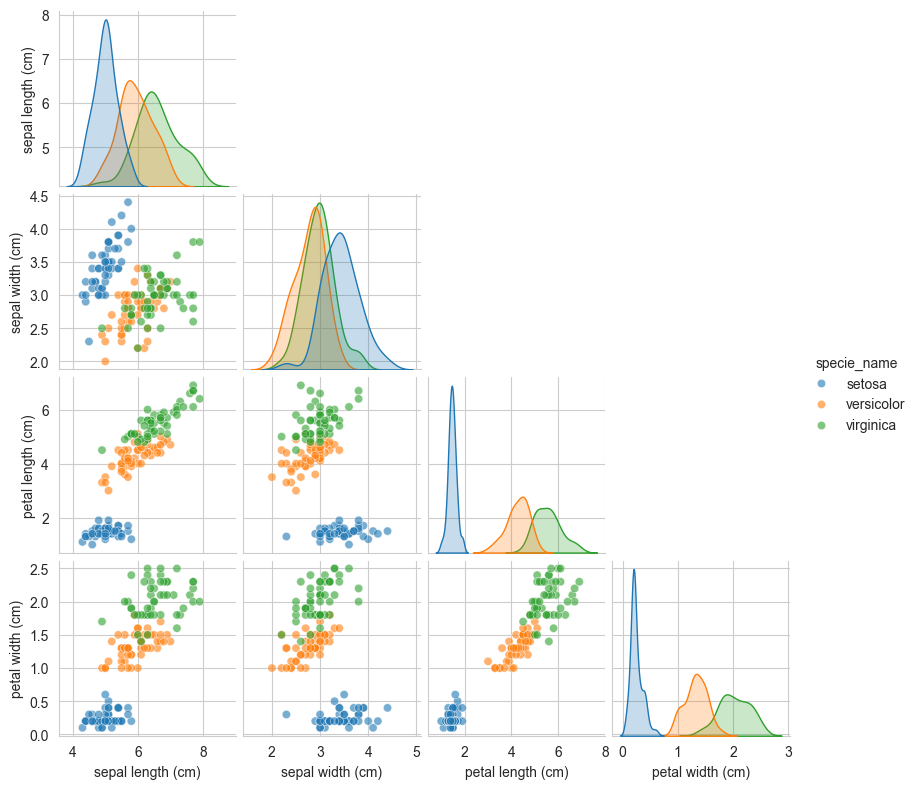

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Skapa en mapping för artnamnen
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['specie_name'] = df['species'].map(species_names)

# Skapa pairplot med färger baserat på 'specie_name'
sns.set_style("whitegrid")
g = sns.pairplot(df, 
                 vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                 hue='specie_name',  # Lägg till färger baserat på 'specie_name'
                 diag_kind="kde",
                 plot_kws={'alpha': 0.6},
                 height=2)

# Ta bort överflödiga plots
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.show()

## D

# Korrelationsheatmap för Iris-datasetet

En korrelationsheatmap är en visuell representation av hur olika variabler i ett dataset korrelerar med varandra. Varje cell i heatmappen visar korrelationsvärdet mellan två variabler, och färgen indikerar styrkan och riktningen av korrelationen.

---

## Hur tolkar man heatmappen?

### 1. **Axlar**
   - **X-axeln och Y-axeln**: Visar variablerna i datasetet (t.ex. `sepal length`, `sepal width`, `petal length`, `petal width`).
   - **Varje cell**: Representerar korrelationen mellan två variabler.

### 2. **Färgskala**
   - **Blå eller kallare färger**: Negativ korrelation (när en variabel ökar, minskar den andra).
   - **Röd eller varmare färger**: Positiv korrelation (när en variabel ökar, ökar den andra också).
   - **Vit eller neutral färg**: Ingen korrelation (variablerna är oberoende av varandra).

### 3. **Siffror i cellerna**
   - **1.0**: Perfekt positiv korrelation.
   - **-1.0**: Perfekt negativ korrelation.
   - **0.0**: Ingen korrelation.

---

## Exempel från Iris-datasetet

### 1. **`sepal length` och `petal length`**
   - Korrelationsvärdet är högt (t.ex. 0.87), vilket betyder att de har en stark positiv korrelation. När `sepal length` ökar, ökar också `petal length`.

### 2. **`sepal width` och `petal length`**
   - Korrelationsvärdet är lågt eller negativt (t.ex. -0.42), vilket betyder att de har en svag negativ korrelation. När `sepal width` ökar, minskar `petal length`.

### 3. **Diagonalen**
   - Varje variabel korrelerar perfekt med sig själv, så diagonalen visar alltid 1.0.

---

## Varför är detta användbart?

- **Identifiera relationer**: Du kan snabbt se vilka variabler som är starkt relaterade till varandra.
- **Undvika multikollinearitet**: Om två variabler är starkt korrelerade kan det vara onödigt att inkludera båda i en modell.
- **Förstå datasetet**: Det ger dig en översikt över hur variablerna påverkar varandra.

---

## Sammanfattning

Heatmappen är ett kraftfullt verktyg för att förstå relationerna mellan variabler i ditt dataset. Genom att titta på färgerna och siffrorna kan du snabbt identifiera starka och svaga korrelationer.

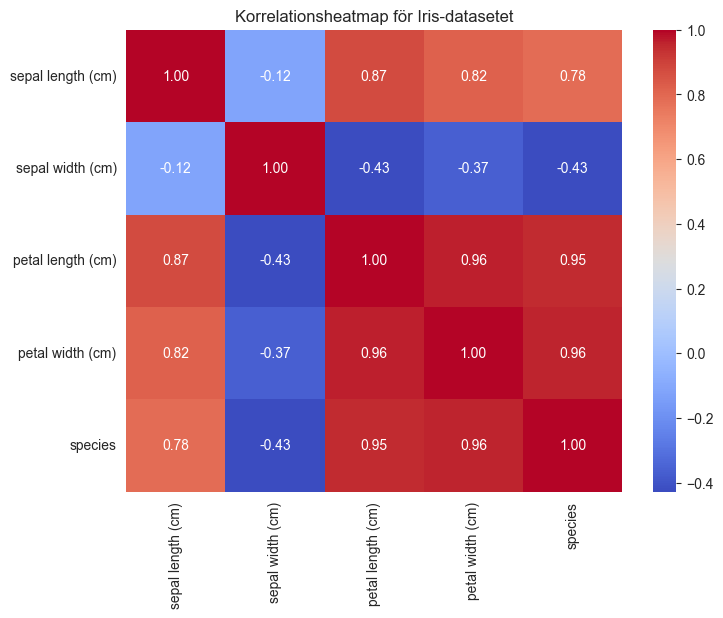

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Beräkna korrelationsmatrisen med den numeriska 'species'-kolumnen
corr = df.corr(numeric_only=True)
""" numeric_only=True: Säkerställer att endast numeriska kolumner 
    inkluderas i korrelationsberäkningen.
"""
# Skapa en heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelationsheatmap för Iris-datasetet')
plt.show()

## E


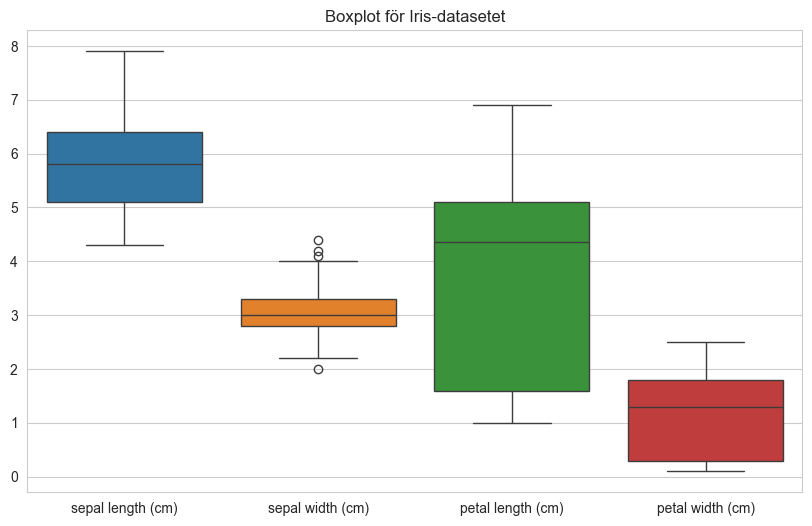

In [165]:

# Skapa boxplot för varje variabel
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
plt.title('Boxplot för Iris-datasetet')
plt.show()

# Boxplot och Outliers

En boxplot är ett kraftfullt verktyg för att visualisera fördelningen av data och identifiera outliers. Här är en förklaring av dess komponenter och hur man identifierar outliers.

---

## Komponenter i en boxplot

1. **Boxen**:
   - Representerar interkvartilavståndet (IQR), dvs. mellan 25:e och 75:e percentilen.
   - **Linjen i boxen**: Medianen (50:e percentilen).

2. **Whiskers**:
   - Visar intervallet för datapunkter som inte anses vara outliers.
   - Whiskers sträcker sig vanligtvis till Q₁ - 1.5 × IQR och Q₃ + 1.5 × IQR.

3. **Outliers**:
   - Punkter utanför whiskers, markerade som enskilda punkter.

---

## Hur identifierar man outliers?

Outliers är datapunkter som ligger utanför följande gränser:


där:
- **Q₁** = 25:e percentilen
- **Q₃** = 75:e percentilen
- **IQR** = Q₃ - Q₁ (interkvartilavståndet)

---

## Exempel från Iris-datasetet

När du skapar en boxplot för Iris-datasetet kan du snabbt identifiera outliers för varje variabel:
- **Outliers**: Markeras som enskilda punkter utanför whiskers.
- **Whiskers**: Visar det normala intervallet för datapunkter.

---

## Varför är detta användbart?

- **Identifiera avvikande värden**: Outliers kan indikera fel i datan eller särskilda fall som behöver undersökas närmare.
- **Förstå datans spridning**: Boxplot ger en översikt över hur datan är fördelad.

## F

In [166]:
# Ta bort raderna med angivna index
outlier_rows = [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]
df_cleaned = df.drop(outlier_rows)

# Antal observationer per art (mer läsbart format)
print(df_cleaned['specie_name'].value_counts().to_string())

specie_name
versicolor    49
virginica     46
setosa        42


### Uppfit 1

# Uppgift 1: Förberedelse av data för logistisk regression

I denna uppgift förbereder vi data för att träna en logistisk regressionsmodell. Stegen innefattar att dela upp datasetet i tränings- och testdata samt att skala datan för att säkerställa att alla features har samma skala. Detta är viktigt för att logistisk regression ska fungera optimalt.

## Steg-för-steg-förklaring

### 1. Dela upp datasetet
Vi använder `train_test_split` för att dela upp datasetet i tränings- och testdata.  
- **`test_size=0.33`** innebär att 33% av datan används som testdata, medan resterande 67% används för träning.  
- **`random_state=42`** säkerställer att delningen är reproducerbar.

### 2. Skala datan
Vi använder `StandardScaler` för att skala datan. Detta innebär att varje feature får ett medelvärde på 0 och en standardavvikelse på 1.  
- **`fit_transform`** används på träningsdata för att beräkna medelvärde och standardavvikelse och sedan skala datan.  
- **`transform`** används på testdata för att applicera samma skalning som träningsdata.

### 3. Kontrollera skalning
Vi kontrollerar medelvärdet och standardavvikelsen för både tränings- och testdata för att säkerställa att skalningen har genomförts korrekt.

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definiera X och y
X = df_cleaned[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_cleaned['species']

# Dela upp i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Skala datan
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kontrollera medelvärde och standardavvikelse
print("Medelvärde för träningsdata:", X_train_scaled.mean(axis=0))
print("Standardavvikelse för träningsdata:", X_train_scaled.std(axis=0))
print("Medelvärde för testdata:", X_test_scaled.mean(axis=0))
print("Standardavvikelse för testdata:", X_test_scaled.std(axis=0))

Medelvärde för träningsdata: [ 2.72065642e-15  2.12741912e-16 -3.14766528e-16  1.26882631e-16]
Standardavvikelse för träningsdata: [1. 1. 1. 1.]
Medelvärde för testdata: [ 0.10020618  0.11137113 -0.00834902  0.07658465]
Standardavvikelse för testdata: [0.94731636 1.03262122 0.93924717 1.01963377]


### Uppgift 2 - Classify with logistic regression




## A

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Skapa en logistisk regressionsmodell
model = LogisticRegression(random_state=42, max_iter=200)

# Utför korsvalidering
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Korsvalideringsresultat:", scores)
print("Genomsnittlig noggrannhet:", scores.mean())

# Träna modellen på hela träningsdata
model.fit(X_train_scaled, y_train)

# Skriv ut modellens parametrar
print("Modellens vikter:", model.coef_)
print("Modellens intercept:", model.intercept_)

Korsvalideringsresultat: [1.         1.         0.94444444 1.         0.94444444]
Genomsnittlig noggrannhet: 0.9777777777777779
Modellens vikter: [[-1.07291543  0.99594783 -1.61145036 -1.49116173]
 [ 0.34260248 -0.42659224 -0.29706341 -0.62358321]
 [ 0.73031295 -0.56935559  1.90851377  2.11474494]]
Modellens intercept: [-0.44017033  1.8402872  -1.40011687]


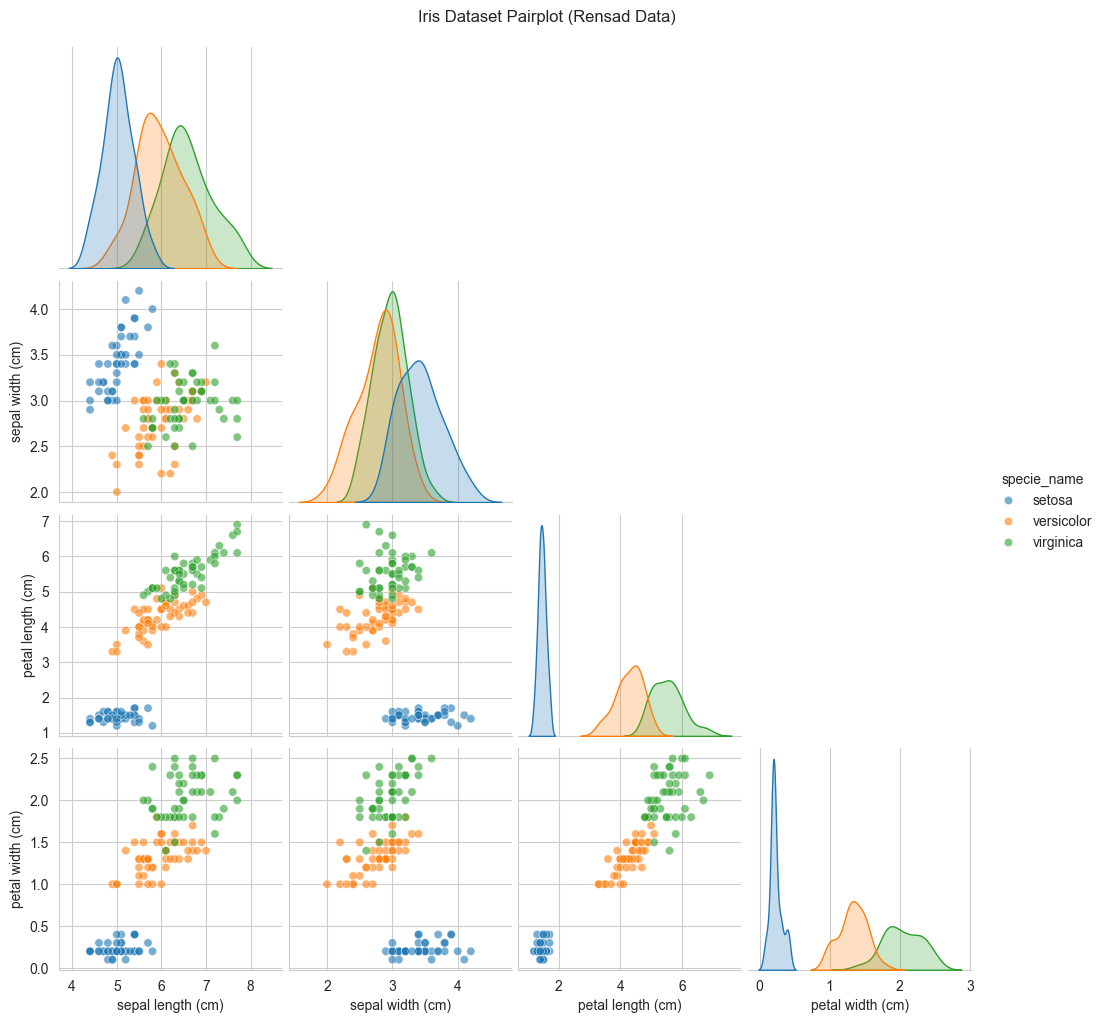

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa pairplot med corner=True för att undvika spegelvända scatterplots
sns.pairplot(data=df_cleaned[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'specie_name']], 
             hue='specie_name',  # Färglägg baserat på 'specie_name'
             corner=True,        # Visa endast nedre triangel
             palette="tab10",    # Använd en färgpalett
             plot_kws={'alpha': 0.6})  # Justera transparens

plt.suptitle('Iris Dataset Pairplot (Rensad Data)', y=1.02)
plt.show()

## Uppgift 3 - Evaluate the model

## A

In [170]:
# 1. Gör förutsägelser på testdata
y_pred = model.predict(X_test_scaled)

# 2. Extrahera de första 10 värdena från y_test och y_pred
y_test_first_10 = y_test[:10]
y_pred_first_10 = y_pred[:10]

# 3. Skriv ut värdena sida vid sida
print("Faktiska klasser (y_test):", y_test_first_10)
print("Förutsägelser (y_pred):   ", y_pred_first_10)

# 4. Jämför och räkna antalet korrekta förutsägelser
correct_predictions = sum(y_test_first_10 == y_pred_first_10)
print("Antal korrekta förutsägelser bland de första 10:", correct_predictions)

Faktiska klasser (y_test): 115    2
114    2
12     0
31     0
136    2
74     1
72     1
127    2
146    2
93     1
Name: species, dtype: int64
Förutsägelser (y_pred):    [2 2 0 0 2 1 1 2 2 1]
Antal korrekta förutsägelser bland de första 10: 10


## B

### Förvirringsmatris

I denna cell skapas och visualiseras en förvirringsmatris för att utvärdera hur väl modellen har klassificerat testdata. En förvirringsmatris visar antalet korrekta och felaktiga förutsägelser för varje klass.


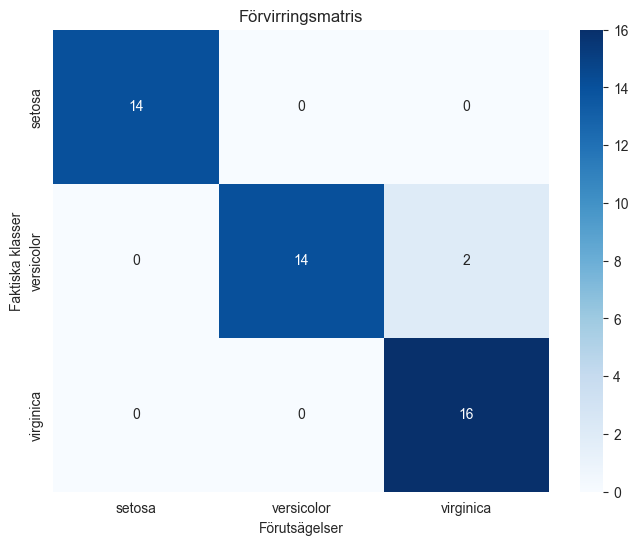

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Skapa en förvirringsmatris
conf_matrix = confusion_matrix(y_test, y_pred)

# 2. Visualisera förvirringsmatrisen
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['setosa', 'versicolor', 'virginica'], 
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Förvirringsmatris')
plt.xlabel('Förutsägelser')
plt.ylabel('Faktiska klasser')
plt.show()

## C


### Klassificeringsrapport

I denna cell används `classification_report` från scikit-learn för att generera en detaljerad rapport om modellens prestanda. Rapporten innehåller precision, recall och F1-score för varje klass samt en översiktlig accuracy.


In [172]:
from sklearn.metrics import classification_report

# Skriv ut en klassificeringsrapport
class_report = classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica'])
print("Klassificeringsrapport:\n", class_report)

Klassificeringsrapport:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93        16
   virginica       0.89      1.00      0.94        16

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



## Uppgift 4- k-folded cross-validation for evaluation

In [173]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Antal folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listor för att samla resultat
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Manuell korsvalidering
for train_index, test_index in kf.split(X_train_scaled):
    # Dela upp datan i tränings- och testset för denna fold
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Träna modellen
    model.fit(X_train_fold, y_train_fold)

    # Gör förutsägelser
    y_pred_fold = model.predict(X_test_fold)

    # Beräkna mått för denna fold
    precision_scores.append(precision_score(y_test_fold, y_pred_fold, average=None))  # För varje klass
    recall_scores.append(recall_score(y_test_fold, y_pred_fold, average=None))        # För varje klass
    f1_scores.append(f1_score(y_test_fold, y_pred_fold, average=None))               # För varje klass
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))                 # Övergripande accuracy

# Beräkna medelvärden för varje mått
mean_precision = np.mean(precision_scores, axis=0)
mean_recall = np.mean(recall_scores, axis=0)
mean_f1 = np.mean(f1_scores, axis=0)
mean_accuracy = np.mean(accuracy_scores)

# Skriv ut resultatet
print(f"Medelprecision för varje klass: {mean_precision}")
print(f"Medelrecall för varje klass: {mean_recall}")
print(f"Medel F1-score för varje klass: {mean_f1}")
print(f"Övergripande medelaccuracy: {mean_accuracy}")

Medelprecision för varje klass: [1.         0.955      0.94642857]
Medelrecall för varje klass: [1.         0.95142857 0.93142857]
Medel F1-score för varje klass: [1.         0.95128205 0.93587302]
Övergripande medelaccuracy: 0.956140350877193
